In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings


warnings.filterwarnings('ignore')

sns.set(style="whitegrid",
        color_codes=True,
        context="notebook",
        rc={"grid.linewidth":0.25,"grid.color":"grey","grid.linestyle":"-"},
        font_scale=1)

sns.set_palette("deep")
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (9,9)

In [ ]:
# Cargamos el DataFrame
df = pd.read_csv('../data/processed/df.csv')

# Filtramos las variables de Interes
df = df[['month','gender','years','edu_lvl','etnicity','1st_source','total']]

# Separamos las variables categoricas y numericas
categorical_features = ['month', 'gender', 'edu_lvl', 'etnicity']
numeric_features = ['years', '1st_source', 'total']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

df_preprocessed = preprocessor.fit_transform(df)
print(df_preprocessed)

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed.toarray())


# Procesamiento en chunks
chunk_size = 1000
chunks = [(i, df_pca[i:i+chunk_size]) for i in range(0, df_pca.shape[0], chunk_size)]

# Aplicar el modelo de clustering a cada chunk
for idx, chunk in chunks:
    hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(chunk)
    
    # Guardamos las predicciones en el dataframe
    df.loc[df.index[idx:idx+chunk_size], 'cluster'] = y_hc



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


El coeficiente de silueta promedio es : -0.0706436656589547


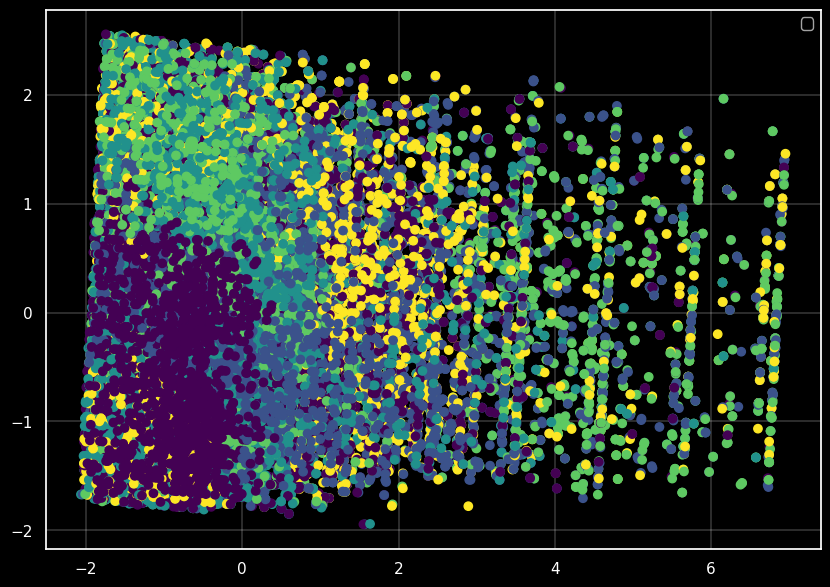

In [24]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(df_pca, df['cluster'])
print("El coeficiente de silueta promedio es :", silhouette_avg)

# Crear un scatter plot de los dos primeros componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.legend()
# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=3)
kmeans_predictions = kmeans.fit_predict(df_preprocessed)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.3)
dbscan_predictions = dbscan.fit_predict(df_preprocessed)

# Calculate metrics for each model
kmeans_silhouette = silhouette_score(df_preprocessed, kmeans_predictions)
dbscan_silhouette = silhouette_score(df_preprocessed, dbscan_predictions)

kmeans_ari = adjusted_rand_score(df['cluster'], kmeans_predictions)
dbscan_ari = adjusted_rand_score(df['cluster'], dbscan_predictions)






